# Single Variable Cost Function 

In [15]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Cost Function
def MSE(x, y, theta):
    m = y.shape[0]
    cost = (1/(2*m))*np.sum((theta*x - y)**2)
    return cost

In [19]:
# Derivative of cost function
def MSE_derivative(x, y, theta):
    m = y.shape[0]
    cost_derivative = (1/m)*np.sum((theta*x - y)*x)
    return cost_derivative

In [6]:
data = pd.read_csv('winequality-red.csv')

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


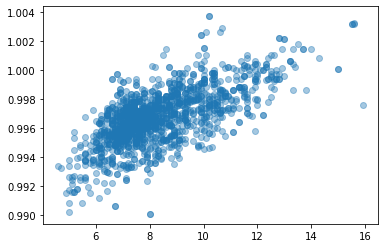

In [11]:
# The goal is to implement linear regression to model the relationship between two features of this dataset: the fixed acidity of the wine and its density. 
# Let’s first look at the scatter plot of these variables:

plt.scatter(data["fixed acidity"], data["density"], alpha=0.4)

In [12]:
# Creating X and y

X = data["fixed acidity"].to_numpy().reshape(-1,1)
X.shape

(1599, 1)

In [13]:
y = data["density"].to_numpy().reshape(-1,1)
y.shape

(1599, 1)

In [17]:
# Standardize the data: transforms the variables to have a mean equals to zero and a standard deviation equals to one.
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [20]:
# Calculating derivative of the cost function using data above. Try with theta = 0:
MSE_derivative(X,y,theta=0)

-0.6680472921189736

In [21]:
# This negative value tells us that we need to increase theta if you want to reduce the cost.
# A weight, called the learning rate, is applied to the derivative allowing us to choose how large are the steps done at each iteration. 
# This is done by multiplying a scalar to the derivative.

learning_rate = 0.1
theta = 0
theta = theta - learning_rate * MSE_derivative(X, y, theta)
theta

0.06680472921189737

In [27]:
# Compare 
print("Initial cost is {}".format(MSE(X, y, 0)))
print("Initial cost_derivative is {}".format(MSE_derivative(X, y, 0)))
print("New cost is {}".format(MSE(X, y, theta)))
print("New cost_derivative is {}".format(MSE_derivative(X, y, theta)))

Initial cost is 0.49999999999999983
Initial cost_derivative is -0.6680472921189736
New cost is 0.45760271747178805
New cost_derivative is -0.6012425629070762


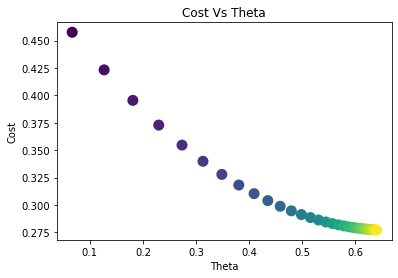

In [44]:
# Let’s iteratively update the parameters, store the cost and the parameter value and plot the cost as a function of the parameters:

lr = 0.1
theta = 0

theta_all = []
cost_all = []

for i in range(30):
    
    theta = theta - lr * MSE_derivative(X, y, theta)
    cost = MSE(X, y, theta)
    
    theta_all.append(theta)
    cost_all.append(cost)
    
plt.scatter(theta_all, cost_all, linewidth=5, c=np.arange(len(cost_all)))
plt.title("Cost Vs Theta")
plt.xlabel("Theta")
plt.ylabel("Cost")
plt.show()

Value of best slope: 0.6397279936234286


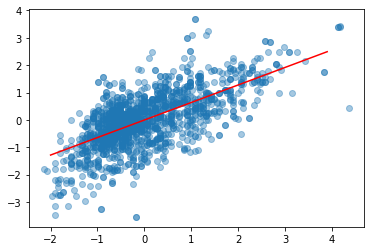

In [49]:
# Let’s see what is the best parameter value that we got and use it to plot the corresponding regression line:

best_slope = theta_all[-1]
print("Value of best slope: {}".format(best_slope))

x_axis = np.arange(-2,4,0.1)
y_axis = best_slope * x_axis
plt.scatter(X, y, alpha=0.4)
plt.plot(x_axis, y_axis, c="r")
plt.show()

# Multivariate Cost Function